# Bagging

## 1. Introduction to Ensemble methods and Bagging 

<b>Bagging</b> is an <b>ensemble method</b> used in machine learning that can be applied to almost any <b>base learner</b> model. Generally speaking, it reduces the <b>variance</b> of the model while maintains the low <b>bias</b> of the model. You may see a lot of new terminologies here that seems overwhelming. No worries, we will go over these concepts one by one. So far all you need to know it that bagging helps us develop a more reliable model. In this code assignment we will be starting from scratch and build up these concepts with yout knowledge in EE16A EE16B and CS61B. 

Here is the outline of the assignment. If you are already familiar with some concept, you can feel free to skim through the part.  
1. Machine learning Basics recap <br>
    1.1 Linear regression <br>
    1.2 Polynomial regression <br>
    1.3 Overfitting<br>
2. Bias and Variance 
    2.1


### 1.1 EE16A ML Recap

In EE16A, we have learned about the basics of machine learning: identifying the problem of classification, estimation, prediction and clustering, mastering some linear algebra techniques to solve machine learning problem, eg. least square, optimizing a loss function. (vFor a quick 16A ML recap please go to https://inst.eecs.berkeley.edu/~ee16a/fa19/lecture/2019-11-12_11A.pdf ) Let's start with a set of problem that we are all familiar with in EE16A, "the line of best fit" problems. 

### ex.1 Linear regression 

In this simple exercise, we will be dealing with a toy example that helps you recap the setting of linear regression. You will also be able to bridge the gap between linear algebra and the larger setting of machine learning problem. Let's say that we are given a set of peerfectly linearly correlated data and we would like to figure out the exact formulation of their relations. We learned in the EE16A that we could formulate the problem as a least square problem and find its solution.

In [50]:
""" Here we create a set of linearly correlated points: wx + b = y. Here w and b are unknown.
"""
w = 1.5
b = 30
x_s, y_s = [], []
for i in range(100):
    x = 100 * random.random() - 50
    xs.append(x)
    ys.append(w * x + b)

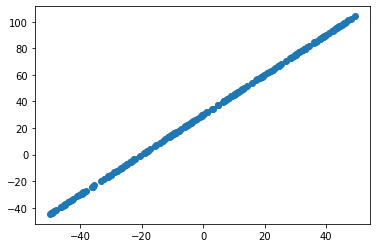

In [51]:
plt.scatter(xs,ys)

Here we know $X$ and $y$ . We can then formulate the problem as $$Ax = b$$  
$$A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
\vdots  & \vdots \\
x_m & 1
\end{bmatrix}$$


$$b = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots\\
y_m
\end{bmatrix}$$ 



<b>Q1:</b> Derive the algebric solution to the Least square problem.

In [52]:
""" Linear Algebra way of solving it comes by matrix calculation
"""
X_s = np.vstack([xs, np.ones(len(xs))]).T
w, b = np.linalg.inv(X_s.T @ X_s)@ X_s.T @ ys
w, b

(1.5000000000000002, 30.0)

<b>Q2:</b> Use Numpy's Least square method to code up the solution

In [54]:
""" Using Numpy's Least square solution
"""
X_s = np.vstack([xs, np.ones(len(xs))]).T
np.linalg.lstsq(X_s,ys, rcond = None) [0]

array([ 1.5, 30. ])

After these calculation we are able to obtain the predicted $Y$<sub>pred</sub> for any given $x$. By far you should be familiar with the pipeline of a basic machine learning problem.

### ex.2. Polynomial Regression

The previous example is set the stage for a larger set of regression problem called polynomial regression. Here we will give you some example to understand the set of regression problem better. Say our ground truth model is a second degree polynomial. If we used linear regression to model the problem, what problem will we have?

Write your observation here:

[]

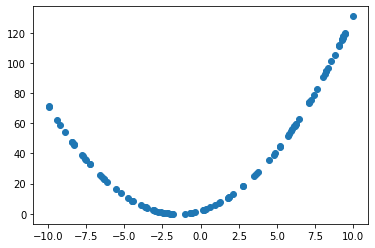

In [55]:
""" The ground truth data is modeled by a second degree polynomial. y = x**2 + 3x +2
"""
x_s, y_s = [], []
for i in range(100):
    x = 20 * random.random() - 10
    x_s.append(x)
    y_s.append(x**2 + 3*x +2)
plt.scatter(x_s,y_s)
plt.plot()

First let us use linear method to model this polynomial data. Plot the line you get on the graph.

In [57]:
X_s = np.vstack([x_s, np.ones(len(x_s))]).T
w, b =np.linalg.lstsq(X_s,y_s, rcond = None) [0]

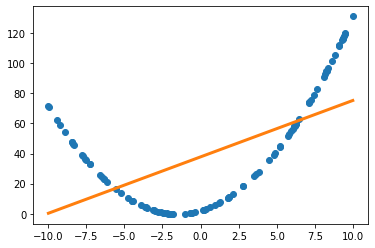

In [61]:
new_x = np.linspace(min(x_s), max(x_s))
new_y = w * new_x + b
plt.plot( x_s,y_s, 'o', new_x, new_y, linewidth = 3)

Numpy method polyfit will help you find the coefficient of polynomial given all the points on the curve. Please derive the most fitted the polynomial and plot it on top of the points.

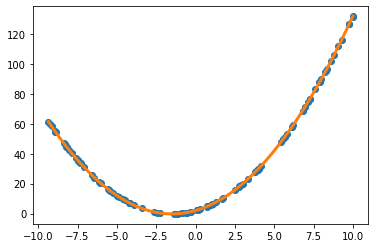

In [48]:
coefficients = np.polyfit(x_s, y_s, deg=2)
poly = np.poly1d(coefficients)
new_x = np.linspace(min(x_s), max(x_s))
new_y = poly(new_x)
plt.plot(x_s, y_s,"o", new_x, new_y, linewidth = 3)

Now, try using polynial of degree 3,5,10 to model the second degree polynomial example. What do you find?

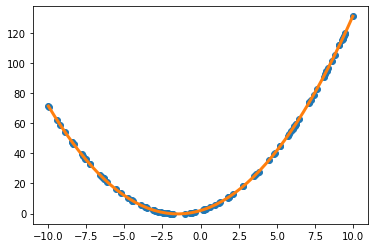

In [77]:
coefficients = np.polyfit(x_s, y_s, deg=10)
poly = np.poly1d(coefficients)
new_x = np.linspace(min(x_s), max(x_s))
new_y = poly(new_x)
plt.plot(x_s, y_s,"o", new_x, new_y, linewidth = 3)

If we use degree 3,5,100, we will get the same result! Since we are ust putting all the terms over 2 degree to zero. Now it seems that there is an advantage to use higher degree polynomials, since it is more expressive and coudl model all sorts of functions. Is this the real case? Let's go into the next section and examine the case when we have imperfect data from real life.

### ex.3. Error term

In real life, it is almost impossible to get a set of perfect gauched data. There is a thousand ways to get things wrong. In this part, let jump out of the perfect examples and step our foot in the real life scenarios with error.

## Introduction to variance and bias 

In Week 2, we have learned about bias-variance decomposition. Let's first do a basic exericse to recap the concept.

In [ ]:
"""Ground Truth Function y = x + sin(1.5x) + """

In [5]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from mlxtend.data import iris_data
from sklearn.model_selection import train_test_split


X, y = iris_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)



tree = DecisionTreeClassifier(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.062
Average bias: 0.022
Average variance: 0.040


In [4]:
from mlxtend.evaluate import bias_variance_decomp

In [6]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=123)
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=100,
                        random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.048
Average bias: 0.022
Average variance: 0.026


In [8]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeRegressor
from mlxtend.data import boston_housing_data
from sklearn.model_selection import train_test_split

X, y = boston_housing_data()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)



tree = DecisionTreeRegressor(random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        tree, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 31.727
Average bias: 14.085
Average variance: 17.642


In [ ]:
from sklearn.ensemble import BaggingRegressor

tree = DecisionTreeRegressor(random_state=123)
bag = BaggingRegressor(base_estimator=tree,
                       n_estimators=100,
                       random_state=123)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        bag, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

In [5]:
import sklearn.svm as svm
import sklearn.datasets as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
import pandas as pd

### Extracting Feature from the original csv File

In [118]:
df = pd.read_csv('Admission_Predict.csv', index_col='Serial No.')
df = df.dropna()
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [119]:
X = df.drop('Chance of Admit ', axis=1)

In [131]:
y_val = df['Chance of Admit '].values
y_val[y_val>0.7] = 1
y_val[y_val != 1] = 0
df['Chance of Admit '] = y_val
y = df['Chance of Admit ']
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1.0
2,324,107,4,4.0,4.5,8.87,1,1.0
3,316,104,3,3.0,3.5,8.00,1,1.0
4,322,110,3,3.5,2.5,8.67,1,1.0
5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,1.0
397,325,107,3,3.0,3.5,9.11,1,1.0
398,330,116,4,5.0,4.5,9.45,1,1.0


# Bootstrap
If we randomly select some observations from dataset and use the sample to estimate some unknown value we want only once, the value cannot represent the real one. Instead, we can select sample multiple time, and average the value we found each time.It will make our prediction closer to the real value. That is the idea of Bootstrap. It is robustness and high efficiency because we do not need to add additional data.
Bootstrap can also be used to create randomness in data.
<img src="https://habrastorage.org/webt/n0/dg/du/n0dgduav1ygc3iylumtwjcn15mu.png">

*Cite: Image from https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging*
Your task for this part is to use Bootstraping to find the average GRE score for students with `Chance of Admit` > 0.8.

a) Before we actually start, let try to find the mean of `GRE Score` in this whole dataset.

In [101]:
real_mean = np.mean(df["GRE Score"])
print(real_mean)

316.8075


b) Select 320 students randomly without replacement, and store the content in the variable called `sample`.

In [103]:
sample = df.sample(320, replace=False)
sample.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
307,323,110,3,4.0,3.5,9.10,1,0.0
72,336,112,5,5.0,5.0,9.76,1,1.0
168,313,102,3,2.0,3.0,8.27,0,0.0
222,316,110,3,3.5,4.0,8.56,0,0.0
5,314,103,2,2.0,3.0,8.21,0,0.0


c) In `sample` dataframe, find the average of GRE Score.

In [104]:
mean = np.mean(sample['GRE Score'])
mean

317.178125

d) Part (b) and (c) show the process of sampleing and finding the mean of sampled `GRE Score`. Now complete bootstrap function, so that we can run this processes multiple times. 

In [105]:
def bootstrap(dataframe, n):
    avg = []
    for i in np.arange(n):
        bootstrap_sample = dataframe.sample(320, replace=False)
        new_avg = np.mean(bootstrap_sample['GRE Score'])
        avg = np.append(avg, new_avg)
    
    mean = np.mean(avg)
    return mean

In [106]:
bootstrap(df, 300)

316.8023229166667

# K-Fold Cross-Validation
In the case of insufficient dataset, we can use K-Fold Cross-Validation to maximize the use of the dataset. 

As you can see in the following image, after separate the dataset into training set and test set, we initialize k, which is the number of folds that we want to separate in the training set. Then we separate the training set into k equally sized subset by using KFold() function. Then we can train our model on each split, and get the corresponding error rate each time. Finally, we average the error, and use it as an estimate of the accuracy of the model algorithm.

<img src="https://www.textbook.ds100.org/_images/bias_cv_5_fold_cv.jpg">

*Cite: Image from:https://www.textbook.ds100.org/ch/15/bias_cv.html?highlight=cross#k-fold-cross-validation*
In this part, we will use linear regression model to predicts TOEFL Score from GRE Score.

a)First, draw a scatter plot between `df['GRE Score']` and `df['TOEFL Score']`. Also set the title and axises.

Text(0, 0.5, 'TOEFL Score')

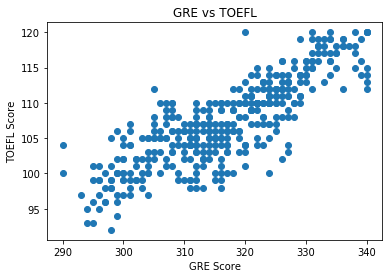

In [108]:
plt.scatter(df['GRE Score'], df['TOEFL Score'])
plt.title("GRE vs TOEFL")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")

b)Split the dataframe into 5 part, i.e. `numsplit` = 5, and compute `k_fold`.

In [132]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 

X_tr, X_te, Y_tr, Y_te = train_test_split(X, y, test_size=0.25)

numsplit = 5
k_fold = KFold(numsplit,shuffle=True, random_state=42)


c) Build linear regression model and finish `rmse` function.

In [110]:
from sklearn import linear_model
model = linear_model.LinearRegression()

def rmse(y_real, y_predict):
    return np.sqrt(np.mean((y_real - y_predict) ** 2))

d) Finish `rmse_kfold` function, and print the average rmse error.

In [111]:
def rmse_kfold(X_tr):
    err = []
    for train_idx, valid_idx in k_fold.split(X_tr):
        split_X_train, split_X_valid = X_tr.iloc[train_idx], X_tr.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_tr.iloc[train_idx], Y_tr.iloc[valid_idx]
        model.fit(split_X_train,split_Y_train)

    train_err = rmse(split_Y_valid,model.predict(split_X_valid))
    err.append(train_err)
    return np.mean(err)


In [112]:
rmse_err = rmse_kfold(X_tr)
print("The rmse error by using K-Fold is", rmse_err)

The rmse error by using K-Fold is 0.2949199790644502


# Overfitting

In [113]:
df['Square_SOP'] = df['SOP'] * 2
df['Sqrt_GRE'] = df['GRE Score'] **0.5
df['Sqrt_Toefl'] = df['TOEFL Score'] **0.5
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Square_SOP,Sqrt_GRE,Sqrt_Toefl
Serial No.,,,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1.0,9.0,18.357560,10.862780
2,324,107,4,4.0,4.5,8.87,1,0.0,8.0,18.000000,10.344080
3,316,104,3,3.0,3.5,8.00,1,0.0,6.0,17.776389,10.198039
4,322,110,3,3.5,2.5,8.67,1,0.0,7.0,17.944358,10.488088
5,314,103,2,2.0,3.0,8.21,0,0.0,4.0,17.720045,10.148892
...,...,...,...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,1.0,7.0,18.000000,10.488088
397,325,107,3,3.0,3.5,9.11,1,1.0,6.0,18.027756,10.344080
398,330,116,4,5.0,4.5,9.45,1,1.0,10.0,18.165902,10.770330


# Decision Tree
Now let's briefly introduce you to decision tree. Tree-based algorithms are a popular family of related non-parametric and supervised methods for both classification and regression. If you're wondering what supervised learning is, it's the type of machine learning algorithms which involve training models with data that has both input and output labels (in other words, we have data for which we know the true class or values, and can tell the algorithm what these are if it predicts incorrectly).

The decision tree looks like a vague upside-down tree with a decision rule at the root, from which subsequent decision rules spread out below. 

Suppose we have four objects to classify: hawk, penguin, dolphin, and bear. It turns out that we can use a decision tree to correctly classify these four animals based on three features: "has feathers?", "Can fly", and "Has finns"

<img src="https://cdn-images-1.medium.com/max/824/0*J2l5dvJ2jqRwGDfG.png">

A numerical representation of decision tree will be a threshold of a specific feature. Let's look at our data as an example. 

In [228]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4)
predY = dt.fit(X_train, y_train).predict(X_test)
predY[predY >= 0.5] = 1
predY[predY != 1] = 0
print("Accuracy of a single decision tree:" + str(accuracy_score(y_test, predY)))

Accuracy of a single decision tree:0.88


In [229]:
tree.export_graphviz(dt, out_file='tree.dot', feature_names=X.columns)

<img src="./tree.png">
It turns out that GPA is still the most important feature for graduate school admission. Go bears.

# Bagging them together
Intuitively, a single tree may not be clever enough to classify our master school students. Now our goal is to implement a model that bags results of multiple decision trees and explore whether bagging is actually going to improve our model.

In [231]:
from sklearn.utils import resample
class BaggedTrees:

    def __init__(self, params=None, n=100):
        if params is None:
            params = {}
        self.params = params
        self.n = n
        self.decision_trees = [
            DecisionTreeClassifier(random_state = i, **self.params)
            for i in range(self.n)
        ]

    def fit(self, X, y):
        for i in range(self.n):
            #change the following line with bootstrapping
            self.decision_trees[i].fit(X_train, y_train)
            #solution
            newX, newy = resample(X_train, y_train, replace = True)
            self.decision_trees[i].fit(newX, newy)
        return self

    def predict(self, X):
        yhat = [self.decision_trees[i].predict(X) for i in range(self.n)]
        # TODO: compute yhat_avg for BaggedTrees
        # HINT: take the average and predict results, note that our prediction only consists of 0 and 1
        ### start code ###
        yhat_avg = np.average(yhat, axis = 0)
        yhat_avg = np.array([int(np.heaviside(i-1/2, 1/2)) for i in yhat_avg])
        ### end code ###
        return yhat_avg

In [233]:
bt = BaggedTrees()
predY = bt.fit(X_train, y_train).predict(X_test)
predY[predY >= 0.5] = 1
predY[predY != 1] = 0
print(accuracy_score(y_test, predY))

0.91


As you can see the accuracy of testing data is getting better after averaging the result from 100 decision trees (or any number of decision trees, your choice).

# Random Forest
Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

But why do we call it a “random” forest? That’s because it is a forest of randomly created decision trees. Each node in the decision tree works on a random subset of features to calculate the output. The random forest then combines the output of individual decision trees to generate the final output.

And that is our bagged trees. Let's see the result of random forest implemented by sklearn

In [175]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 30,n_estimators = 50,random_state=1)
predY = rf.fit(X_train, y_train).predict(X_test)
predY[predY >= 0.5] = 1
predY[predY != 1] = 0
print(accuracy_score(y_test, predY))

0.91


# Add other datasets

# Bagging

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


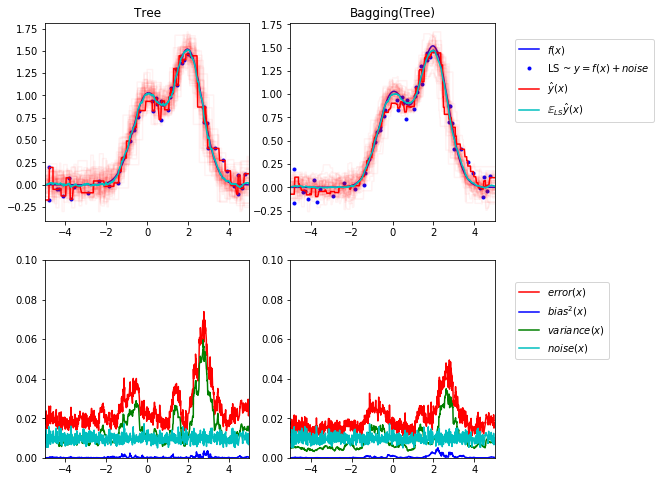

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75)
plt.show()

# Reference
https://blog.paperspace.com/decision-trees/